#### CSCA Introduction to Machine Learning: Supervised Learning
## Final Project: Stack Overflow Developer Analysis
***

### Project Summary
 - Gives a clear explanation of what the project is about 
 - and clearly states both the type of learning/algorithm s and type of task.

Objective:
 - clearly states the motivation or the goal for the project

Data Source:
 The dataset for this analysis is from Stack Overflow Annual Developer Survey 2023
 - Includes a brief explanation of where the data is from/how it was gathered and if the data is from a public source, cites the dataset using the format of a style manual like APA.
 - The data description should include the data size. (tabulated data: number of samples/rows, number of features/columns)



### Data Cleaning

1. Does it include clear explanations on how and why a cleaning is performed?
a. E.g. the author decided to drop a feature because it had too many NaN values and the data cannot be imputed.
b. E.g. the author decided to impute certain values in a feature because the number of missing values were small and he/she was able to find similar samples OR, he/she used an average value or interpolated value, etc.
c. E.g. the author removed some features because there are too many of them and they are not relevant to the problem, or he/she knows only a few
 (0 pts)
Uses a dataset that hasn’t been cleaned without attempting any cleaning.
(5 pts)
One of the following situations: Uses a clean dataset and indicates that the dataset didn’t require further cleaning or attempted a data cleaning but was missing at least one of the following: clear explanations of how and why cleaning steps were performed or conclusions/discu ssions (E.g., the
(10 pts)
Includes all three of the following: clear explanations of how and why cleaning steps were performed and conclusions or discussions (E.g. the data cleaning summary, findings, discussing foreseen difficulties and/or analysis strategy.) and proper visualizations.
E.g., for tabulated data, meeting the
certain features are important based
on their domain knowledge judgement. d. E.g. the author removed a certain
sample (row) or a value because it is
an outlier.
2. Does it have conclusions or discussions?
a. E.g. the data cleaning summary, findings, discussing foreseen difficulties and/or analysis strategy.
3. Does it have proper visualizations? a. For example, for tabulated data,
meeting the benchmark for moderate data cleaning could include: data type munging, drop NA, impute missing values, check for imbalance, look for any data-specific potential problems, and address issues found.
b. If the data is not in tabulated form (E.g., image, sound, text, etc.), focus on answering the three questions above.
Note: if you are using a dataset that is already clean, you can receive five points if you note that the dataset is already clean and do not do anything further for this section.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [29]:
df['CompTotal'].unique()

array([        nan, 2.85000e+05, 2.50000e+05, ..., 3.55410e+04,
       2.12021e+05, 3.30000e+09])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [31]:
columns_to_keep = [
    'Age', 'Employment', 'RemoteWork', 'EdLevel',
    'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize','Country','LanguageHaveWorkedWith',
    'PlatformHaveWorkedWith', 'DatabaseHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'OpSysProfessional use',
    'ICorPM', 'Industry',
    'ConvertedCompYearly'
]

In [32]:
df = df[columns_to_keep]
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS);Netlify;Vercel,Supabase,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),People manager,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      89184 non-null  object 
 1   Employment               87898 non-null  object 
 2   RemoteWork               73810 non-null  object 
 3   EdLevel                  87973 non-null  object 
 4   YearsCode                87435 non-null  object 
 5   YearsCodePro             66136 non-null  object 
 6   DevType                  76872 non-null  object 
 7   OrgSize                  65043 non-null  object 
 8   Country                  87973 non-null  object 
 9   LanguageHaveWorkedWith   87140 non-null  object 
 10  PlatformHaveWorkedWith   63628 non-null  object 
 11  DatabaseHaveWorkedWith   73435 non-null  object 
 12  ToolsTechHaveWorkedWith  77884 non-null  object 
 13  OpSysProfessional use    78587 non-null  object 
 14  ICorPM                

In [34]:
df = df.dropna(subset=['ConvertedCompYearly'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      48019 non-null  object 
 1   Employment               48007 non-null  object 
 2   RemoteWork               47940 non-null  object 
 3   EdLevel                  48019 non-null  object 
 4   YearsCode                47950 non-null  object 
 5   YearsCodePro             47825 non-null  object 
 6   DevType                  47904 non-null  object 
 7   OrgSize                  47982 non-null  object 
 8   Country                  48019 non-null  object 
 9   LanguageHaveWorkedWith   47883 non-null  object 
 10  PlatformHaveWorkedWith   37375 non-null  object 
 11  DatabaseHaveWorkedWith   41764 non-null  object 
 12  ToolsTechHaveWorkedWith  44055 non-null  object 
 13  OpSysProfessional use    45030 non-null  object 
 14  ICorPM                   32

In [35]:
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS);Netlify;Vercel,Supabase,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),People manager,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0
5,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Amazon Web Services (AWS);Cloudflare;Google Cloud,BigQuery;Cloud Firestore;PostgreSQL;Redis,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,MacOS,Individual contributor,Other,96828.0


In [36]:
import re

def convert_age_range_to_avg(text):
    numbers = [int(age) for age in re.findall(r'\d+', text)]
    return sum(numbers) / len(numbers)

df = df[df['Age'] != 'Prefer not to say']

df['Age'] = df['Age'].apply(convert_age_range_to_avg)
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
1,29.5,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS);Netlify;Vercel,Supabase,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),People manager,"Information Services, IT, Software Development...",285000.0
2,49.5,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,29.5,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,29.5,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0
5,39.5,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Amazon Web Services (AWS);Cloudflare;Google Cloud,BigQuery;Cloud Firestore;PostgreSQL;Redis,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,MacOS,Individual contributor,Other,96828.0


In [37]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
       nan, 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, full-time;Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [38]:
df = df[df['Employment'].str.contains('full-time', na=False)]
df = df.drop(columns=['Employment'])

In [39]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [40]:
# Custom function to transform values
def transform_education(value):
    if 'Bachelor’s degree' in value:
        return 'Bachelor’s degree'
    elif 'Master’s degree' in value:
        return 'Master’s degree'
    elif 'Professional degree' in value:
        return 'Professional degree'
    else:
        return 'Others'

# Apply the function
df['EdLevel'] = df['EdLevel'].apply(transform_education)

In [41]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree      20611
Master’s degree        11495
Others                  8701
Professional degree     2039
Name: count, dtype: int64

<Axes: xlabel='EdLevel'>

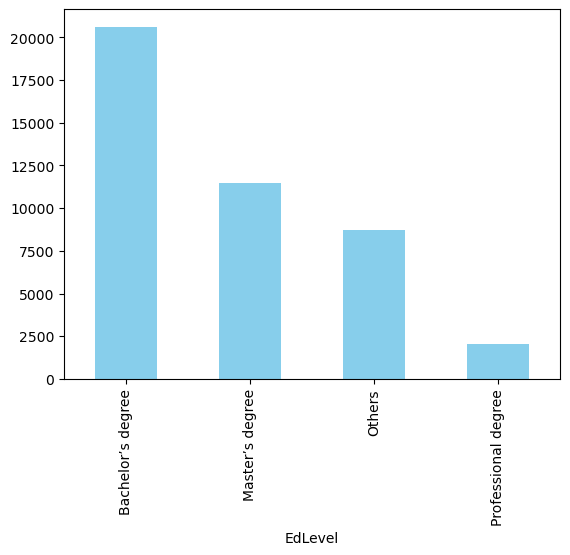

In [42]:
df['EdLevel'].value_counts().plot(kind='bar', color='skyblue')

In [43]:
df = df.dropna(subset=['YearsCode', 'YearsCodePro'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42666 entries, 1 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      42666 non-null  float64
 1   RemoteWork               42666 non-null  object 
 2   EdLevel                  42666 non-null  object 
 3   YearsCode                42666 non-null  object 
 4   YearsCodePro             42666 non-null  object 
 5   DevType                  42646 non-null  object 
 6   OrgSize                  42641 non-null  object 
 7   Country                  42666 non-null  object 
 8   LanguageHaveWorkedWith   42557 non-null  object 
 9   PlatformHaveWorkedWith   33111 non-null  object 
 10  DatabaseHaveWorkedWith   37014 non-null  object 
 11  ToolsTechHaveWorkedWith  39238 non-null  object 
 12  OpSysProfessional use    40058 non-null  object 
 13  ICorPM                   30241 non-null  object 
 14  Industry                 25

In [44]:
def transform_years(value):
    if 'Less than' in value:
        return '1'
    elif 'More than' in value:
        return '50'
    else:
        return value

# Apply the function
df['YearsCode'] = df['YearsCode'].apply(transform_years)
df['YearsCode'] = df['YearsCode'].astype('int')
df['YearsCode']

1        18
2        27
3        12
4         6
5        21
         ..
89162    30
89166     7
89167     6
89170    18
89171    20
Name: YearsCode, Length: 42666, dtype: int64

In [45]:
df['YearsCodePro'] = df['YearsCodePro'].apply(transform_years)
df['YearsCodePro'] = df['YearsCodePro'].astype('int')
df['YearsCodePro']

1         9
2        23
3         7
4         4
5        21
         ..
89162    24
89166     2
89167     2
89170     9
89171     9
Name: YearsCodePro, Length: 42666, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42666 entries, 1 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      42666 non-null  float64
 1   RemoteWork               42666 non-null  object 
 2   EdLevel                  42666 non-null  object 
 3   YearsCode                42666 non-null  int64  
 4   YearsCodePro             42666 non-null  int64  
 5   DevType                  42646 non-null  object 
 6   OrgSize                  42641 non-null  object 
 7   Country                  42666 non-null  object 
 8   LanguageHaveWorkedWith   42557 non-null  object 
 9   PlatformHaveWorkedWith   33111 non-null  object 
 10  DatabaseHaveWorkedWith   37014 non-null  object 
 11  ToolsTechHaveWorkedWith  39238 non-null  object 
 12  OpSysProfessional use    40058 non-null  object 
 13  ICorPM                   30241 non-null  object 
 14  Industry                 25

In [47]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator', 'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Developer, mobile',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Academic researcher', 'Database administrator',
       'Other (please specify):', 'Developer Experience',
       'Engineering manager', 'Cloud infrastructure engineer',
       'DevOps specialist', 'Engineer, site reliability',
       'Project manager', 'Blockchain', 'Developer, game or graphics',
       'Developer Advocate', 'Hardware Engineer', 'Educator', 'Scientist',
       'Marketing or sales professional', nan, 'Student'], dtype=object)

In [48]:
df = df[df['DevType'].str.contains('developer|engineer|scientist', na=False, case=False)]

In [49]:
df.head()

,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
2,49.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,29.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,29.5,Remote,Bachelor’s degree,6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0
5,39.5,Remote,Others,21,21,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Amazon Web Services (AWS);Cloudflare;Google Cloud,BigQuery;Cloud Firestore;PostgreSQL;Redis,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,MacOS,Individual contributor,Other,96828.0
6,39.5,Remote,Others,4,3,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,Amazon Web Services (AWS);Digital Ocean,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,MacOS,Individual contributor,"Information Services, IT, Software Development...",135000.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36640 entries, 2 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      36640 non-null  float64
 1   RemoteWork               36640 non-null  object 
 2   EdLevel                  36640 non-null  object 
 3   YearsCode                36640 non-null  int64  
 4   YearsCodePro             36640 non-null  int64  
 5   DevType                  36640 non-null  object 
 6   OrgSize                  36624 non-null  object 
 7   Country                  36640 non-null  object 
 8   LanguageHaveWorkedWith   36556 non-null  object 
 9   PlatformHaveWorkedWith   28735 non-null  object 
 10  DatabaseHaveWorkedWith   32115 non-null  object 
 11  ToolsTechHaveWorkedWith  34008 non-null  object 
 12  OpSysProfessional use    34424 non-null  object 
 13  ICorPM                   26337 non-null  object 
 14  Industry                 22

In [51]:
df['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    8323
100 to 499 employees                                  7794
10,000 or more employees                              4909
1,000 to 4,999 employees                              4630
10 to 19 employees                                    3036
2 to 9 employees                                      2851
500 to 999 employees                                  2825
5,000 to 9,999 employees                              1629
I don’t know                                           420
Just me - I am a freelancer, sole proprietor, etc.     207
Name: count, dtype: int64

In [52]:
def convert_org_range_to_avg(text):
    numbers = [int(age) for age in re.findall(r'\d+', text)]
    return sum(numbers) / len(numbers)

df = df[df['OrgSize'] != 'I don’t know']
df = df.dropna(subset=['OrgSize'])
df['OrgSize'] = df['OrgSize'].replace('Just me - I am a freelancer, sole proprietor, etc.', '1')

df['OrgSize'] = df['OrgSize'].apply(convert_org_range_to_avg)
df.head()

,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
2,49.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,27,23,"Developer, back-end",253.25,United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,29.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,12,7,"Developer, front-end",299.50,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,29.5,Remote,Bachelor’s degree,6,4,"Developer, full-stack",59.50,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0
5,39.5,Remote,Others,21,21,"Developer, back-end",299.50,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Amazon Web Services (AWS);Cloudflare;Google Cloud,BigQuery;Cloud Firestore;PostgreSQL;Redis,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,MacOS,Individual contributor,Other,96828.0
6,39.5,Remote,Others,4,3,"Developer, full-stack",251.00,United States of America,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,Amazon Web Services (AWS);Digital Ocean,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,MacOS,Individual contributor,"Information Services, IT, Software Development...",135000.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36204 entries, 2 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      36204 non-null  float64
 1   RemoteWork               36204 non-null  object 
 2   EdLevel                  36204 non-null  object 
 3   YearsCode                36204 non-null  int64  
 4   YearsCodePro             36204 non-null  int64  
 5   DevType                  36204 non-null  object 
 6   OrgSize                  36204 non-null  float64
 7   Country                  36204 non-null  object 
 8   LanguageHaveWorkedWith   36120 non-null  object 
 9   PlatformHaveWorkedWith   28429 non-null  object 
 10  DatabaseHaveWorkedWith   31741 non-null  object 
 11  ToolsTechHaveWorkedWith  33615 non-null  object 
 12  OpSysProfessional use    34013 non-null  object 
 13  ICorPM                   26025 non-null  object 
 14  Industry                 22

In [54]:
def count_skills(skills):
    if pd.isna(skills):
        return 0  # or np.nan if you want to keep NaN as is
    else:
        return len(skills.split(';'))

# Apply this function to each element in the DataFrame
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(count_skills)

In [55]:

# Apply this function to each element in the DataFrame
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].apply(count_skills)
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].apply(count_skills)
df['ToolsTechHaveWorkedWith'] = df['ToolsTechHaveWorkedWith'].apply(count_skills)


In [56]:
df['OpSysProfessional use'] = df['OpSysProfessional use'].apply(count_skills)

In [57]:
df['ICorPM'] = df['ICorPM'].fillna('Others')

In [58]:
df['Industry'] = df['Industry'].fillna('Unknown')
df['Industry'] = df['Industry'].replace('1', 'Unknown')
df['Industry'].unique()

array(['Information Services, IT, Software Development, or other Technology',
       'Unknown', 'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education', 'Insurance',
       'Healthcare', 'Oil & Gas', 'Legal Services', 'Wholesale',
       'Advertising Services'], dtype=object)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36204 entries, 2 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      36204 non-null  float64
 1   RemoteWork               36204 non-null  object 
 2   EdLevel                  36204 non-null  object 
 3   YearsCode                36204 non-null  int64  
 4   YearsCodePro             36204 non-null  int64  
 5   DevType                  36204 non-null  object 
 6   OrgSize                  36204 non-null  float64
 7   Country                  36204 non-null  object 
 8   LanguageHaveWorkedWith   36204 non-null  int64  
 9   PlatformHaveWorkedWith   36204 non-null  int64  
 10  DatabaseHaveWorkedWith   36204 non-null  int64  
 11  ToolsTechHaveWorkedWith  36204 non-null  int64  
 12  OpSysProfessional use    36204 non-null  int64  
 13  ICorPM                   36204 non-null  object 
 14  Industry                 36

### Exploratory Data Analysis (EDA)

Does it include clear explanations on how and why an analysis (EDA) is performed?
1. Does it have proper visualizations?
2. Does it have proper analysis? E.g.,
histogram, correlation matrix, feature
importance (if possible) etc.
3. Does it have conclusions or discussions?
E.g., the EDA summary, findings, discussing foreseen difficulties and/or analysis strategy.

### Models

Proper single model and at least three of the following:
● addresses multilinear regression/collin earity
● feature engineering
● multiple ML models
● hyperparameter tuning
● regularization or other training techniques such as cross validation, oversampling/un dersampling/SM OTE or similar for managing data imbalance
● uses models not covered in class

 Is the choice of model(s) appropriate for the problem?
● Is the author aware of whether interaction/collinearity between features can be a problem for the choice of the model? Does the author properly treat if there is interaction or collinearity (e.g., linear regression)? Or does the author confirm that there is no such effect with the choice of the model?
● Did the author use multiple (appropriate) models?
● Did the author investigate which features are important by looking at feature rankings or importance from the model? (Not by judgment- which we already covered in the EDA category)
● Did the author use techniques to reduce overfitting or data imbalance?
● Did the author use new techniques/models we didn't cover in the class?
